# Домашнее задание №2 Чебыкина Артёма

### №1

Загружаем библиотеки и считываем данные

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
DataSet = pd.read_excel("data/marketing_campaign.xlsx")

Подсчитываем число жалоб

In [2]:
ComplaintsSum = DataSet['Complain'].sum()
print(ComplaintsSum)

21


Вводим дополнительную колонку возраста для будущих расчётов

In [3]:
DataSet['Age'] = 2024 - DataSet['Year_Birth']

Находим всех людей, которые что-либо купили

In [4]:
column_names = ['MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
DataSet['MntTotal']= DataSet[column_names].sum(axis=1)
ByersList = DataSet[DataSet['MntTotal'] > 0]

Вычисляем их возраст, а также средний возраст всех людей из Датасета

In [5]:
print(round(ByersList['Age'].mean(),4))
print(round(DataSet['Age'].mean(),4))

55.1942
55.1942


Возраст получился одинаковым, значит все люди являются покупателями

### №2

Смерджим данные Single и Alone в графе Marital_Status, ибо они означают одно и то же

In [6]:
def MergeAloneToSingle(x):
    if x == 'Alone':
        return 'Single'
    return x

In [7]:
DataSet['Marital_Status'] = DataSet['Marital_Status'].apply(MergeAloneToSingle)

<Axes: xlabel='Education', ylabel='Income'>

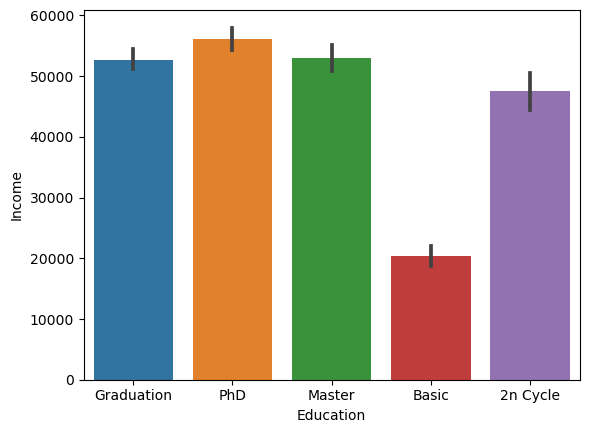

In [8]:
sns.barplot(data=DataSet, x = "Education", y = "Income")

Уровень образования существенно влияет на доход человека, если мы сравниваем людей с и без высшего образования.
При этом сам тип высшего образования не так значительно влияет на доход

<Axes: xlabel='Marital_Status', ylabel='Income'>

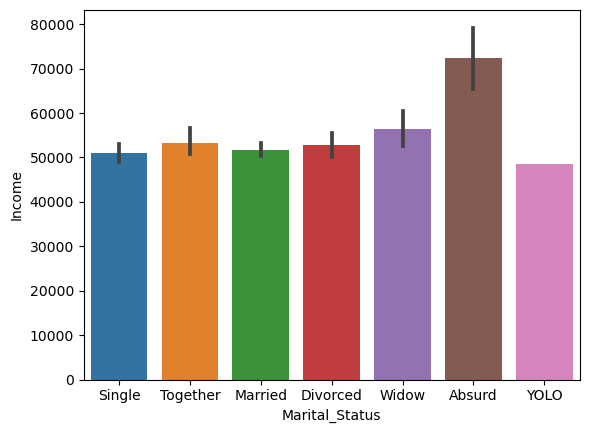

In [9]:
sns.barplot(data=DataSet, x = "Marital_Status", y = "Income")

У всех категорий людей доходы схожи, кроме загадочной категории Absurd

<Axes: xlabel='Kidhome', ylabel='Income'>

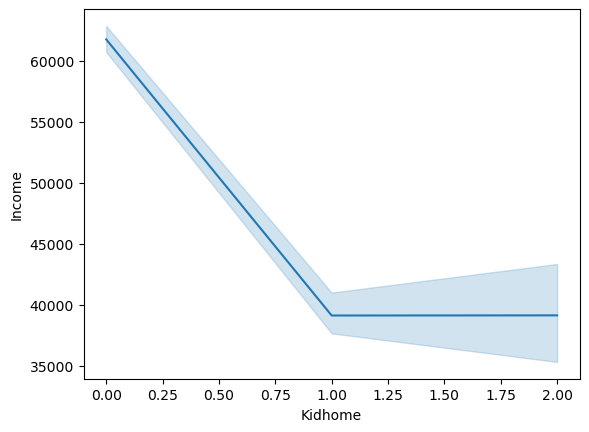

In [10]:
sns.lineplot(data=DataSet, x = "Kidhome", y = "Income")

График говорит сам за себя: чем больше маленьких детей - тем меньше доходы(так как нужно тратить меньше времени на карьеру)

<Axes: xlabel='Teenhome', ylabel='Income'>

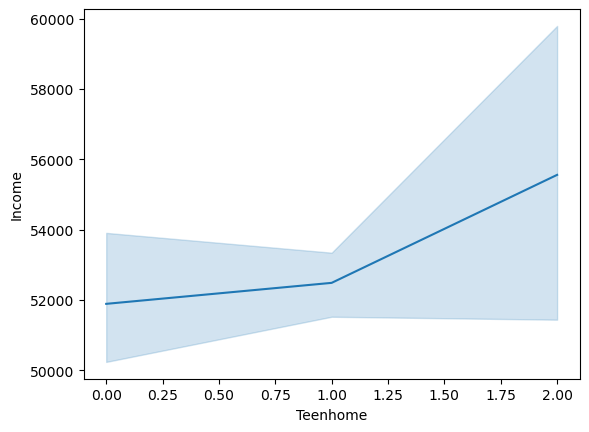

In [11]:
sns.lineplot(data=DataSet, x = "Teenhome", y = "Income")

Интересно, что чем больше подростков, тем выше доход.
Возможно это связано с тем, что граждане с подростками находятся в самом продуктивном возрасте своей жизни: 35-55 лет, поэтому и зарабатывают больше 

<Axes: xlabel='Age', ylabel='Income'>

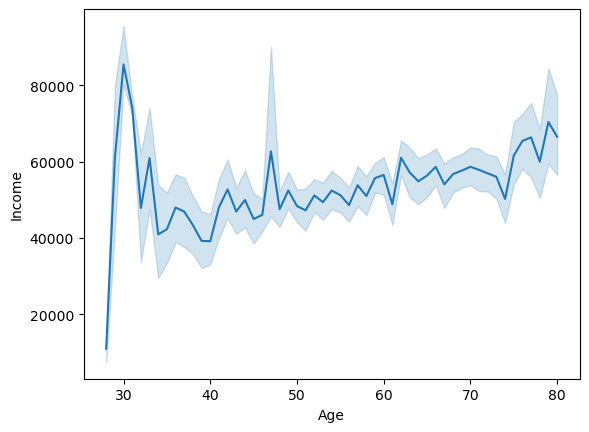

In [12]:
sns.lineplot(data=DataSet[DataSet['Age'] <= 80], x = "Age", y = "Income")

Четкой корреляции, кроме пика в молодом возрасте не видно. В среднем после упадка около 40 лет, доход начинает медленно расти

<Axes: xlabel='Education', ylabel='NumWebPurchases'>

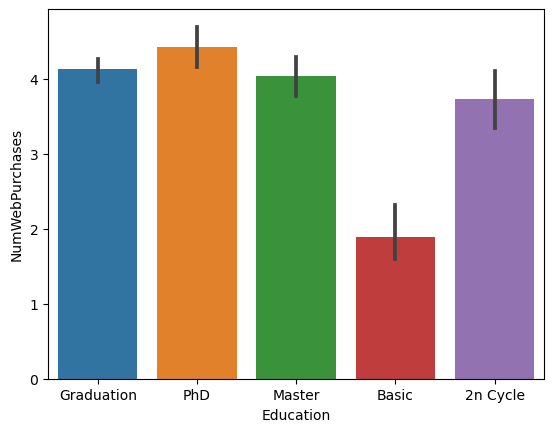

In [13]:
sns.barplot(data=DataSet, x = "Education", y = "NumWebPurchases")

<Axes: xlabel='Education', ylabel='NumStorePurchases'>

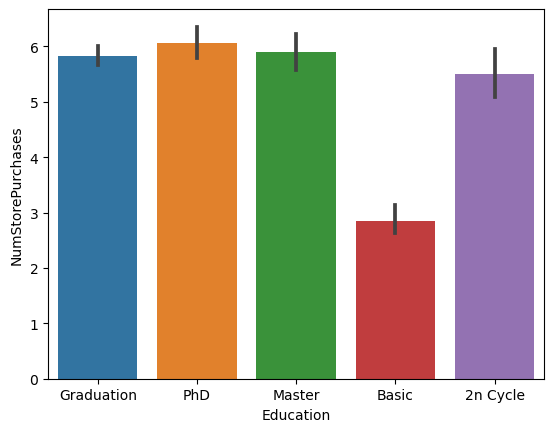

In [14]:
sns.barplot(data=DataSet, x = "Education", y = "NumStorePurchases")

Посмотрев на один из графиков мы могли бы сделать неправильные выводы а людей без высшего образования. 
На самом деле такие люди в принципе совершают меньше любых покупок.
При этом онлайн покупок все совершают меньше чем оффлайн, на примерно один и тот же процент

<Axes: xlabel='Education', ylabel='Age'>

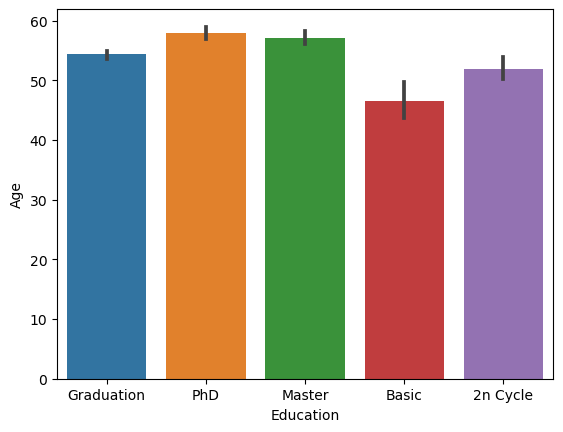

In [15]:
sns.barplot(data=DataSet, x = "Education", y = "Age")

В принципе наличие образования не сильно коррелирует с возрастом(хотя понятно, что чем в среднем человек старше, тем больше шанс у него иметь образование)

<Axes: xlabel='Education', ylabel='Kidhome'>

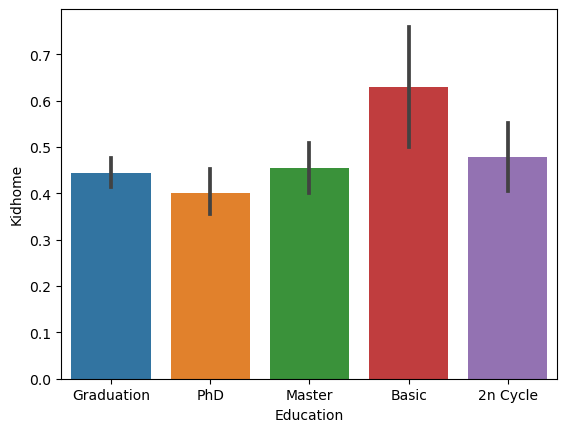

In [16]:
sns.barplot(data=DataSet, x = "Education", y = "Kidhome")

Графики снова говорят сами за себя: у людей с отсутсвием высшего образования - больше детей

<Axes: xlabel='Education', ylabel='Teenhome'>

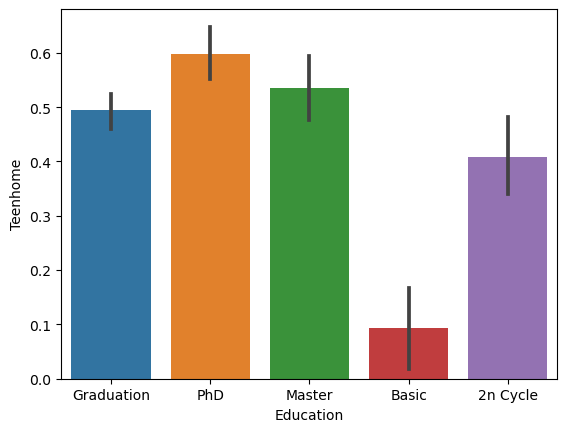

In [17]:
sns.barplot(data=DataSet, x = "Education", y = "Teenhome")

А ситуация с подростками прямо противоположна.
Видимо люди продолжают получать образование пока у них растут дети, либо просто выборка недостаточно велика чтобы делать какие-то выводы